In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import torch
import torch.nn.functional as F
import numpy as np
from torch.nn.parameter import Parameter
import matplotlib.pyplot as plt
from time import time
import scipy.io as sio
import tables
import os
from torch import autograd
from time import time
from collections import Counter
import math
import timeit
import os
import struct
import glob
import re
from scipy.fftpack import fft
import seaborn as sns
import pandas as pd
import sys
import scipy
import pickle
import tracemalloc
from scipy import signal
from copy import deepcopy
from pytorch_memlab import MemReporter
import pyldpc
from sklearn import datasets
import bisect
import torch
from utils.loss import DECOLLELoss, one_hot_crossentropy
from model.LIF_MLP import LIFMLP
from tqdm import tqdm
from optimizer.BBSNN import BayesBiSNNRP
from copy import deepcopy
import os
import argparse
import numpy as np
from data_preprocessing.load_data import get_batch_example
from collections import Counter
import pickle
import fnmatch
import time
from utils.misc import make_moon_dataset_bin, make_moon_dataset_bin_pop_coding, make_moon_test_dataset_bin_pop_coding
from sklearn.manifold import TSNE

(array([1314.,  764.,  631.,  497.,  402.,  304.,  282.,  296.,  281.,
         605.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

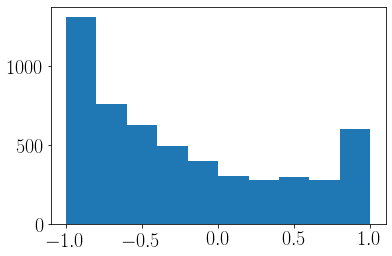

In [5]:
res = r"C:\Users\K1804053\results\009__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.250000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
plt.hist(torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy())

(array([ 606.,  277.,  309.,  337.,  345.,  384.,  494.,  608.,  737.,
        1279.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

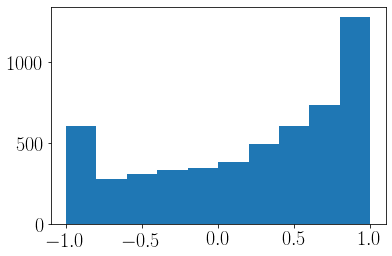

In [16]:
res = r"C:\Users\K1804053\results\010__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.750000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
plt.hist(torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy())

(array([ 744.,  460.,  446.,  413.,  443.,  416.,  484.,  440.,  511.,
        1019.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

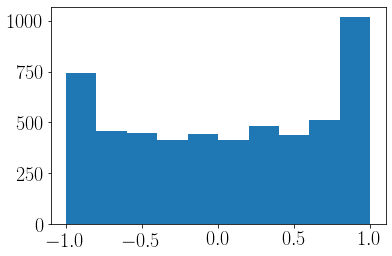

In [18]:
res = r"C:\Users\K1804053\results\001__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.500000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))

plt.hist(torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy())

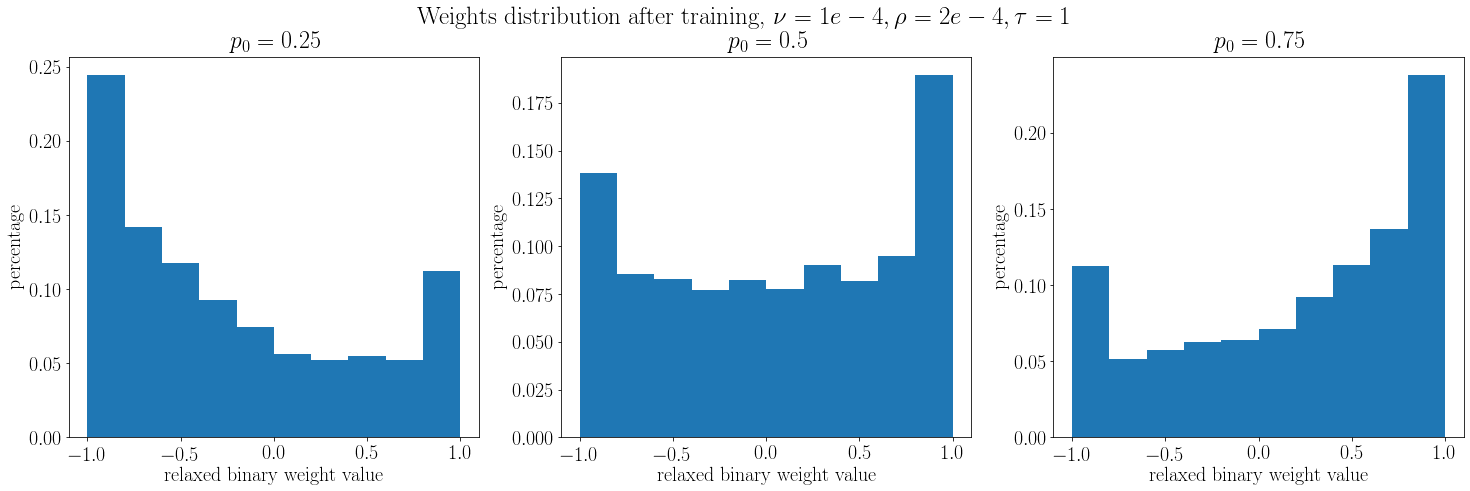

In [21]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(1, 3, figsize=(25,7))



res = r"C:\Users\K1804053\results\009__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.250000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
weights = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy()
axs[0].hist(weights, weights=np.ones(len(weights)) / len(weights))
axs[0].set_xlabel(r'relaxed binary weight value')
axs[0].set_ylabel(r'percentage')
axs[0].set_title(r'$p_0=0.25$')




res = r"C:\Users\K1804053\results\001__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.500000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
weights = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy()
axs[1].hist(weights, weights=np.ones(len(weights)) / len(weights))
axs[1].set_xlabel(r'relaxed binary weight value')
axs[1].set_ylabel(r'percentage')
axs[1].set_title(r'$p_0=0.5$')


res = r"C:\Users\K1804053\results\010__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.750000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
weights = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy()
axs[2].hist(weights, weights=np.ones(len(weights)) / len(weights))
axs[2].set_xlabel(r'relaxed binary weight value')
axs[2].set_ylabel(r'percentage')

axs[2].set_title(r'$p_0=0.75$')


fig.suptitle(r'Weights distribution after training, $\nu=1e-4, \rho=2e-4, \tau=1$', fontsize=25)
plt.savefig(r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN\weights_distribution.pdf", format='pdf', dpi=1000)

(array([0.16331845, 0.00837054, 0.00520833, 0.01227679, 0.02064732,
        0.01953125, 0.03106399, 0.54315476, 0.01655506, 0.17987351]),
 array([1.0322154e-25, 1.0000000e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

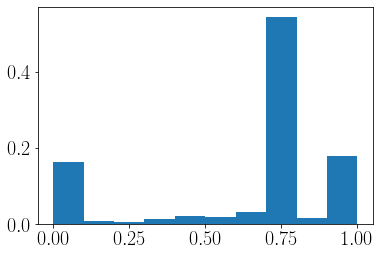

In [15]:
res = r"C:\Users\K1804053\results\009__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.250000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/latent_model_weights.pt'))

test = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad])
test = torch.pow(2 * test, 10) / (1 + torch.pow(2 * test, 10))
plt.hist(test, weights=np.ones(len(test)) / len(test))


In [3]:
from sklearn.manifold import TSNE
from data_preprocessing.load_data import get_batch_example
from snn.utils.misc import find_indices_for_labels

In [4]:
# dataset = tables.open_file(r"C:\Users\K1804053\OneDrive - King's College London\PycharmProjects\datasets\mnist-dvs\mnist_dvs_events.hdf5")
# test_data = dataset.root.test
# train_data = dataset.root.train

# batch_size = 32

# dt = 5000  # us
# sample_length = 2000  # length of samples during training in ms
# T = int(sample_length * 1000 / dt)  # number of timesteps in a sample
# input_size = [2 * (dataset.root.stats.train_data[1] ** 2)]


# labels_considered = [i for i in range(10)]

# idx_train = find_indices_for_labels(train_data, labels_considered)
# n_samples_train = len(idx_train)
# n_batchs_train = n_samples_train // batch_size + (1 - (n_samples_train % batch_size == 0))
# inputs_train = torch.Tensor()
# labels_train = torch.Tensor()

# idx_test = find_indices_for_labels(test_data, labels_considered)
# n_samples_test = len(idx_test)
# n_batchs_test = n_samples_test // batch_size + (1 - (n_samples_test % batch_size == 0))
# inputs_test = torch.Tensor()
# labels_test = torch.Tensor()

# n_classes = dataset.root.stats.test_data[1]

# idxs_used = []


# for i in range(n_batchs_train):
#     if (i == (n_batchs_train - 1)) & (n_samples_train % batch_size != 0):
#         batch_size_curr = min(len(idx_train), n_samples_train % batch_size)
#     else:
#         batch_size_curr = batch_size

#     idxs = np.random.choice(idx_train, [batch_size_curr], replace=False)
#     idxs_used += list(idxs)
#     idx_train = [j for j in idx_train if j not in idxs_used]

#     inputs, labels = get_batch_example(train_data, idxs, batch_size_curr, T, labels_considered, input_size, dt, dataset.root.stats.train_data[1], True)
    
#     inputs_train = torch.cat((inputs_train, torch.sum(inputs, dim=1)/T))
#     labels_train = torch.cat((labels_train, torch.argmax(torch.sum(labels, dim=-1)/T, dim=-1)))


# idxs_used = []

# for i in range(n_batchs_test):
#     if (i == (n_batchs_test - 1)) & (n_samples_test % batch_size != 0):
#         batch_size_curr = min(len(idx_test), n_samples_test % batch_size)
#     else:
#         batch_size_curr = batch_size

#     idxs = np.random.choice(idx_test, [batch_size_curr], replace=False)
#     idxs_used += list(idxs)
#     idx_test = [j for j in idx_test if j not in idxs_used]

#     inputs, labels = get_batch_example(test_data, idxs, batch_size_curr, T, labels_considered, input_size, dt, dataset.root.stats.test_data[1], True)

#     inputs_test = torch.cat((inputs_test, torch.sum(inputs, dim=1) / T))
#     labels_test = torch.cat((labels_test, torch.argmax(torch.sum(labels, dim=-1) / T, dim=-1)))


In [5]:
# save_path = r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN"

# np.save(save_path + r'\inputs_train.npy', inputs_train)
# np.save(save_path + r'\labels_train.npy', labels_train)

# np.save(save_path + r'\inputs_test.npy', inputs_test)
# np.save(save_path + r'\labels_test.npy', labels_test)

In [7]:
inputs_train.shape, labels_train.shape

(torch.Size([9000, 1352]), torch.Size([9000]))

In [104]:
# save_path = r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN"
# inputs_train = np.load(save_path + r'\inputs_train.npy')
# labels_train = np.load(save_path + r'\labels_train.npy')
# inputs_test = np.load(save_path + r'\inputs_test.npy')
# labels_test = np.load(save_path + r'\labels_test.npy')

In [8]:
# inputs_train_sorted = np.zeros([9000, 1352])
# labels_train_sorted = np.zeros([9000])

# inputs_test_sorted = np.zeros([1000, 1352])
# labels_test_sorted = np.zeros([1000])
# labels = [i for i in range(10)]

# for lbl in labels:
#     idxs_label_train = np.where(labels_train == lbl)[0]
#     inputs_train_sorted[900 * lbl: 900 * (lbl+1)] = inputs_train[idxs_label_train]
#     labels_train_sorted[900 * lbl: 900 * (lbl+1)] = lbl
    
#     idxs_label_test = np.where(labels_test == lbl)[0]
#     inputs_test_sorted[100 * lbl: 100 * (lbl+1)] = inputs_test[idxs_label_test]
#     labels_test_sorted[100 * lbl: 100 * (lbl+1)] = lbl

    
# np.save(save_path + r'\inputs_train_sorted.npy', inputs_train_sorted)
# np.save(save_path + r'\labels_train_sorted.npy', labels_train_sorted)

# np.save(save_path + r'\inputs_test_sorted.npy', inputs_test_sorted)
# np.save(save_path + r'\labels_test_sorted.npy', labels_test_sorted)

In [2]:
save_path = r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN"
inputs_train = np.load(save_path + r'\inputs_train_sorted.npy')
labels_train = np.load(save_path + r'\labels_train_sorted.npy')
inputs_test = np.load(save_path + r'\inputs_test_sorted.npy')
labels_test = np.load(save_path + r'\labels_test_sorted.npy')

In [3]:
inputs_ = np.vstack((inputs_train, inputs_test))
labels_ = np.hstack((labels_train, labels_test))
inputs_.shape, labels_.shape

((10000, 1352), (10000,))

In [4]:
tsne = TSNE()
test = tsne.fit_transform(inputs_, labels_)

In [11]:
results_file = r'C:\Users\K1804053\results\049__10-11-2020_mnist_dvs_bbsnnrp_genfull_10000_epochs_temp_1.000000_prior_0.500000_rho_0.000001_lr_0.001000'

T = int(2000 * 1000 / 5000)

idxs_train_mode = np.load(results_file + r'\idxs_test_mode.npy')
preds_train_mode = np.load(results_file + r'\test_predictions_latest_mode.npy')

idxs_test_mode = np.load(results_file + r'\idxs_train_mode.npy')
preds_test_mode = np.load(results_file + r'\train_predictions_latest_mode.npy')

# preds_train_mode = (preds_train_mode - np.min(preds_train_mode)) / (np.max(preds_train_mode) - np.min(preds_train_mode))
# preds_train_mode = (preds_train_mode - np.min(preds_train_mode, axis=-1)[:, None]) / (np.max(preds_train_mode, axis=-1)[:, None] - np.min(preds_train_mode, axis=-1)[:, None])
preds_train_mode = torch.softmax(torch.tensor(preds_train_mode / T), axis=-1).numpy()

# preds_test_mode = (preds_test_mode - np.min(preds_test_mode)) / (np.max(preds_test_mode) - np.min(preds_test_mode))
# preds_test_mode = (preds_test_mode - np.min(preds_test_mode, axis=-1)[:, None]) / (np.max(preds_test_mode, axis=-1)[:, None] - np.min(preds_test_mode, axis=-1)[:, None])
preds_test_mode = torch.softmax(torch.tensor(preds_test_mode / T), axis=-1).numpy()



idxs_train_mean = np.load(results_file + r'\idxs_test_mean.npy')
preds_train_mean = np.load(results_file + r'\test_predictions_latest_mean.npy')

idxs_test_mean = np.load(results_file + r'\idxs_train_mean.npy')
preds_test_mean = np.load(results_file + r'\train_predictions_latest_mean.npy')

# preds_train_mean = (preds_train_mean - np.min(preds_train_mean)) / (np.max(preds_train_mean) - np.min(preds_train_mean))
# preds_train_mean = (preds_train_mean - np.min(preds_train_mean, axis=-1)[:, None]) / (np.max(preds_train_mean, axis=-1)[:, None] - np.min(preds_train_mean, axis=-1)[:, None])
preds_train_mean = torch.softmax(torch.tensor(preds_train_mean / T), axis=-1).numpy()

# preds_test_mean = (preds_test_mean - np.min(preds_test_mean)) / (np.max(preds_test_mean) - np.min(preds_test_mean))
# preds_test_mean = (preds_test_mean - np.min(preds_test_mean, axis=-1)[:, None]) / (np.max(preds_test_mean, axis=-1)[:, None] - np.min(preds_test_mean, axis=-1)[:, None])
preds_test_mean = torch.softmax(torch.tensor(preds_test_mean / T), axis=-1).numpy()

In [14]:
preds_test_mean.shape

(400, 4)

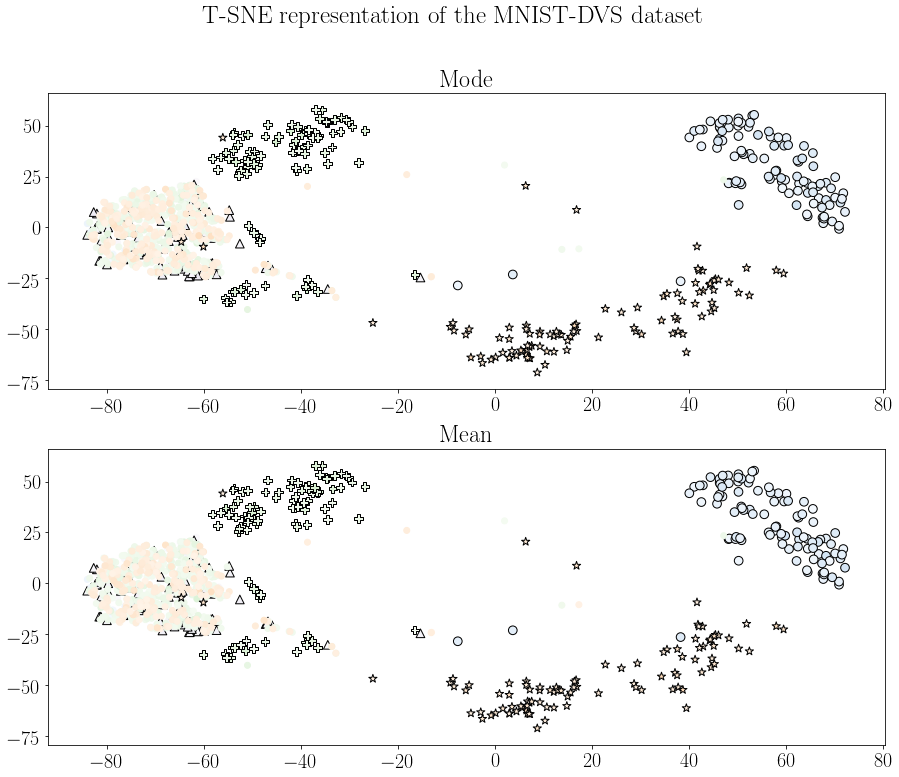

In [12]:
cmap = {0:'Purples', 1:'Blues', 6:'Greens', 9:'Oranges'}
markers = {0:'^', 1:'o', 6:'P', 9:'*'}

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(2, 1, figsize=(15, 12))
labels_considered = [0, 1, 6, 9]


for i, lbl in enumerate(labels_considered):
    idxs_predicted_lbl_train = idxs_train_mode[np.where(np.argmax(preds_train_mode, axis=-1) == i)[0]]
    transformed = test[:9000][idxs_predicted_lbl_train]
    axs[0].scatter(transformed[:, 0], transformed[:, 1], c=np.max(preds_train_mode[np.where(np.argmax(preds_train_mode, axis=-1) == i)[0]], axis=-1), cmap=cmap[lbl], vmin=1/len(labels_considered), vmax=1)



    idxs_test_lbl = idxs_test_mode[np.where(labels_test[idxs_test_mode] == lbl)[0]]
    idxs_test_mode_lbl = np.where(labels_test[idxs_test_mode] == lbl)[0]

    for j, lbl_predicted in enumerate(labels_considered):
        idxs_predicted_lbl_test = idxs_test_lbl[np.where(np.argmax(preds_test_mode[idxs_test_mode_lbl], axis=-1) == j)[0]]

        transformed = test[9000:][idxs_predicted_lbl_test]

        axs[0].scatter(transformed[:, 0], transformed[:, 1], s=75, c=np.max(preds_test_mode[np.where(np.argmax(preds_test_mode[idxs_test_mode_lbl], axis=-1) == j)[0]], axis=-1), marker=markers[lbl], cmap=cmap[lbl], vmin=1/len(labels_considered), vmax=1, edgecolor='black')
axs[0].set_title('Mode')


for i, lbl in enumerate(labels_considered):
    idxs_predicted_lbl_train = idxs_train_mean[np.where(np.argmax(preds_train_mean, axis=-1) == i)[0]]
    transformed = test[:9000][idxs_predicted_lbl_train]
    axs[1].scatter(transformed[:, 0], transformed[:, 1], c=np.max(preds_train_mean[np.where(np.argmax(preds_train_mean, axis=-1) == i)[0]], axis=-1), cmap=cmap[lbl], vmin=1/len(labels_considered), vmax=1)


    idxs_test_lbl = idxs_test_mean[np.where(labels_test[idxs_test_mean] == lbl)[0]]
    idxs_test_mean_lbl = np.where(labels_test[idxs_test_mean] == lbl)[0]

    for j, lbl_predicted in enumerate(labels_considered):
        idxs_predicted_lbl_test = idxs_test_lbl[np.where(np.argmax(preds_test_mean[idxs_test_mean_lbl], axis=-1) == j)[0]]

        transformed = test[9000:][idxs_predicted_lbl_test]

        axs[1].scatter(transformed[:, 0], transformed[:, 1], s=75, c=np.max(preds_test_mean[np.where(np.argmax(preds_test_mean[idxs_test_mean_lbl], axis=-1) == j)[0]], axis=-1), marker=markers[lbl], cmap=cmap[lbl], vmin=1/len(labels_considered), vmax=1, edgecolor='black')
axs[1].set_title('Mean')

fig.suptitle(r'T-SNE representation of the MNIST-DVS dataset', fontsize=25)

# for lbl in labels_considered:
#     scat = axs.scatter([0], [0], alpha=1., c=[0.99], marker=markers[lbl], cmap=cmap[lbl], vmin=0, vmax=1, edgecolor='black')
#     fig.colorbar(scat, ax=axs)

plt.savefig(r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN\tsne_mnistdvs.pdf", format='pdf', dpi=1000)

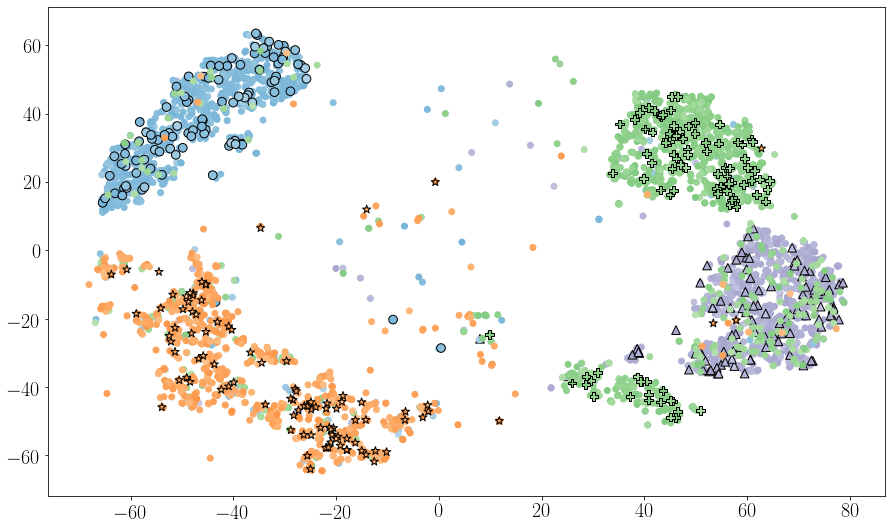

In [82]:
cmap = {0:'Purples', 1:'Blues', 6:'Greens', 9:'Oranges'}
markers = {0:'^', 1:'o', 6:'P', 9:'*'}

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(1, 1, figsize=(15,9))
labels_considered = [0, 1, 6, 9]



# for lbl in labels_considered:
#     scat = axs.scatter([0], [0], alpha=1., c=[0.99], marker=markers[lbl], cmap=cmap[lbl], vmin=0, vmax=1, edgecolor='black')
#     fig.colorbar(scat, ax=axs, orientation='vertical')


0 869
0 0 92


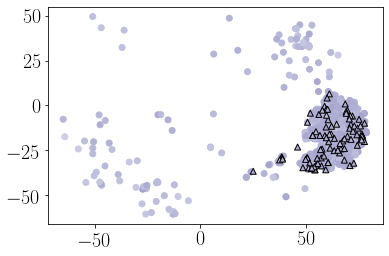

In [62]:
lbl = 0
labels_considered = [0, 1, 6, 9]
i = 0

idxs_predicted_lbl_train = idxs_train_mode[np.where(np.argmax(preds_train_mode, axis=-1) == i)[0]]
print(lbl, len(idxs_predicted_lbl_train))
transformed = test[:9000][idxs_predicted_lbl_train]
plt.scatter(transformed[:, 0], transformed[:, 1], c=np.max(preds_train_mode[np.where(np.argmax(preds_train_mode, axis=-1) == i)[0]], axis=-1), cmap=cmap[lbl], vmin=0, vmax=1)



idxs_test_lbl = idxs_test_mode[np.where(labels_test[idxs_test_mode] == lbl)[0]]
idxs_test_mode_lbl = np.where(labels_test[idxs_test_mode] == lbl)[0]

j = 0
lbl_predicted = 0

idxs_predicted_lbl_test = idxs_test_lbl[np.where(np.argmax(preds_test_mode[idxs_test_mode_lbl], axis=-1) == j)[0]]
print(lbl, lbl_predicted, len(idxs_predicted_lbl_test))

transformed = test[9000:][idxs_predicted_lbl_test]

plt.scatter(transformed[:, 0], transformed[:, 1], c=np.max(preds_test_mode[np.where(np.argmax(preds_test_mode[idxs_test_mode_lbl], axis=-1) == j)[0]], axis=-1), marker=markers[lbl], cmap=cmap[lbl], vmin=0, vmax=1, edgecolor='black')


In [61]:
colors = ['Purple','Blue', 'Green', 'Orange']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95, 97, 98, 99], dtype=int64)

In [31]:
idxs_predicted_lbl_test

array([  0,   3,  10,  14,  18,  30,  32,  40,  42,  52,  55,  57,  63,
        67,  71,  73,  76,  77,  87,  90,  91,  97,  99, 101, 106, 114,
       117, 121, 124, 128, 129, 130, 135, 145, 149, 151, 158, 163, 164,
       169, 171, 173, 176, 177, 178, 185, 186, 187, 190, 203, 204, 205,
       207, 214, 215, 217, 228, 229, 232, 240, 247, 249, 255, 258, 260,
       262, 269, 278, 285, 287, 289, 290, 291, 293, 296, 305, 307, 308,
       319, 322, 325, 326, 327, 328, 332, 355, 357, 363, 375, 383, 391,
       393], dtype=int64)

In [94]:
idxs_test_lbl # idxs_test_mode_red where the true label is lbl


array([  0, 339, 324,  94, 390, 125, 302, 391, 209, 218,  82, 379, 118,
       274,  49, 370, 215, 105,  32, 257, 352, 317,   9, 363, 172, 229,
       233, 332, 284, 399,  18, 249,  31, 318, 167, 251, 382, 101, 132,
       241,  87, 333,  97, 353, 242, 190, 356, 103, 141, 278, 320, 260,
        23, 236, 268,  91, 143,  24, 106, 104, 309,  20, 195,  13, 340,
       386, 194,  40, 227, 389, 300,  19, 165,  61, 182, 325,   4,  50,
       269, 313, 164, 162, 222, 388, 262, 111, 359,  15, 131, 169,  21,
        41, 377, 303, 360, 219, 383,  58, 192,  76, 351,  27, 212, 126,
       173, 211,  30, 371, 145, 202, 158, 230, 166, 193,   7, 314, 381,
         5, 119, 261, 384,  38, 246, 296,  44, 213, 398, 137,  56,  60,
        88, 337, 374, 100, 252,  80, 310, 358, 168, 228, 146, 140, 224,
       285, 225,  98, 216, 299, 136,  11, 307,  48, 174, 155, 142, 387,
       346, 226,  14, 385, 220, 291, 354,  72,  84, 210, 305, 156, 322,
        85, 341,  99, 187,   3, 270, 115,  55,   6,  10, 147, 31

In [69]:
results_file = r'C:\Users\K1804053\results\002__05-11-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.500000_rho_0.000001_lr_0.001000'


# preds_train_mean = np.max(preds_train_mean, axis=-1)
preds_train_mean, preds_test_mean

(array([[0.16009095, 0.1448003 , 0.30150077, 0.39360803],
        [0.22583444, 0.15913722, 0.4325798 , 0.1824485 ],
        [0.18266317, 0.20438778, 0.1648474 , 0.4481017 ],
        ...,
        [0.15563184, 0.17148681, 0.4230512 , 0.24983013],
        [0.13214791, 0.18895215, 0.35921523, 0.31968468],
        [0.1696784 , 0.4588579 , 0.2026593 , 0.16880439]], dtype=float32),
 array([[0.18169433, 0.18077257, 0.46607408, 0.17145908],
        [0.16605626, 0.44277635, 0.22827913, 0.16288832],
        [0.18016621, 0.17451335, 0.47176707, 0.1735534 ],
        ...,
        [0.16483024, 0.44805503, 0.18944466, 0.19767009],
        [0.43756703, 0.16097191, 0.18708023, 0.21438083],
        [0.1525445 , 0.1774514 , 0.25534526, 0.41465893]], dtype=float32))

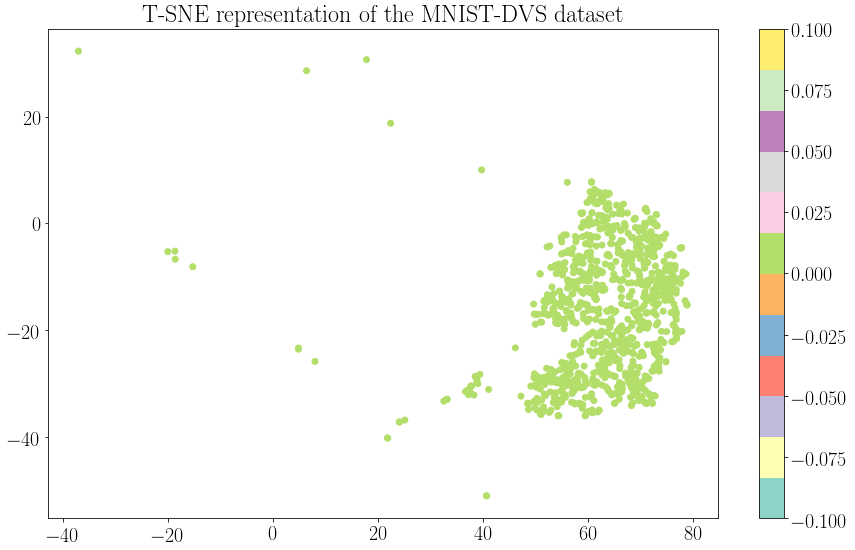

In [59]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(1, 1, figsize=(15,9))

idxs_0 = np.where(labels_ == 0)[0]

scat = axs.scatter(test[idxs_0, 0], test[idxs_0, 1], c=labels_[idxs_0], cmap='Set3')
fig.colorbar(scat, ax=axs)

axs.set_title('T-SNE representation of the MNIST-DVS dataset')
plt.savefig(r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN\tsne_mnistdvs.pdf", format='pdf', dpi=1000)

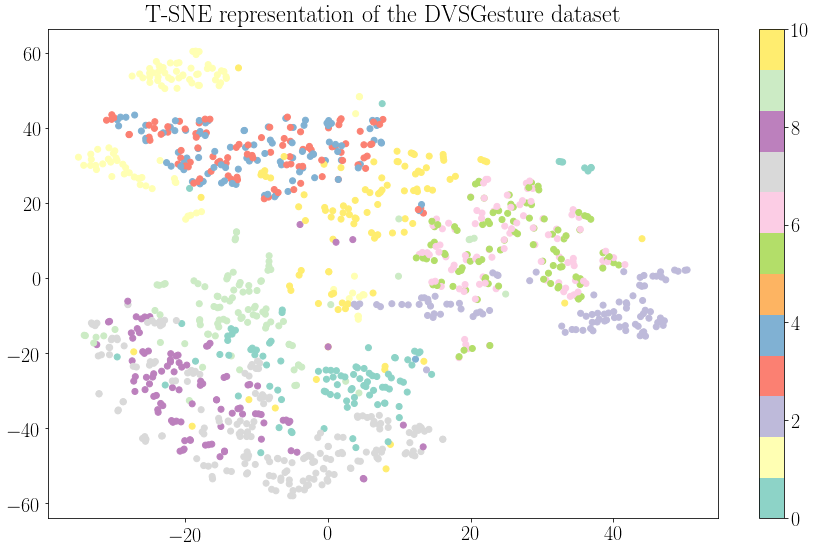

In [13]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(1, 1, figsize=(15,9))

scat = axs.scatter(test[:, 0], test[:, 1], c=labels_, cmap='Set3')
fig.colorbar(scat, ax=axs)

axs.set_title('T-SNE representation of the DVSGesture dataset')
plt.savefig(r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN\tsne_dvsgesture.pdf", format='pdf', dpi=1000)

In [39]:
dataset = tables.open_file(r"C:\Users\K1804053\OneDrive - King's College London\PycharmProjects\datasets\mnist-dvs\mnist_dvs_events.hdf5")
test_data = dataset.root.test
train_data = dataset.root.train

batch_size = 32

dt = 25000  # us
sample_length = 2000  # length of samples during training in ms
T = int(sample_length * 1000 / dt)  # number of timesteps in a sample
input_size = [2, 26, 26]
n_classes = dataset.root.stats.test_data[1]
n_samples = dataset.root.stats.train_data[0]

n_batchs = n_samples // batch_size + (1 - (n_samples % batch_size == 0))
idx_avail = np.arange(n_samples)
idxs = np.random.choice(idx_avail, [batch_size], replace=False)

inputs, labels = get_batch_example(train_data, idxs, batch_size, T, n_classes, input_size, dt, dataset.root.stats.train_data[1], True)


(<matplotlib.image.AxesImage at 0x283a9818278>, tensor(3))

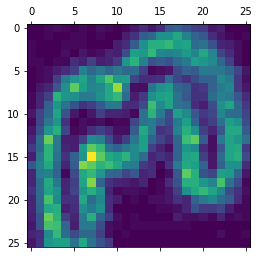

In [46]:
inputs_img = torch.sum(inputs, dim=(1,2)).numpy()
idx = 8
plt.matshow(inputs_img[idx]), torch.argmax(torch.sum(labels, dim=-1)/T, dim=-1)[idx]

In [129]:
def make_output_from_labels(labels, T, classes):
    out = torch.zeros([len(labels), len(classes), T])
    mapping = {classes[i]: i for i in range(len(classes))}
    out[[i for i in range(len(labels))], [mapping[lbl] for lbl in labels], :] = 1
    return out

In [131]:
labels = np.random.choice([0, 1, 6, 9], [10])
make_output_from_labels(labels, 15, [0, 1, 6, 9])

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
